In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('supermarket sales.csv')
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [4]:
# Remove unnecessary columns
data.drop(['Invoice ID', 'Date'], axis=1, inplace=True)

# Rename columns for easier readability
data.rename(columns={'Branch': 'branch', 'City': 'city', 'Customer type': 'customer_type',
                     'Gender': 'gender', 'Product line': 'product_line', 'Unit price': 'unit_price',
                     'Quantity': 'quantity', 'Tax 5%': 'tax_5_percent', 'Total': 'total',
                     'Time': 'time', 'Payment': 'payment'}, inplace=True)

# Convert categorical variables to appropriate data types
data['branch'] = data['branch'].astype('category')
data['city'] = data['city'].astype('category')
data['customer_type'] = data['customer_type'].astype('category')
data['gender'] = data['gender'].astype('category')
data['product_line'] = data['product_line'].astype('category')
data['payment'] = data['payment'].astype('category')

In [5]:
data

,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_percent,total,time,payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,13:22,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,15:33,Cash,65.82,4.761905,3.2910,4.1


In [6]:
# Check for missing or null data
data.isnull().sum()

branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5_percent              0
total                      0
time                       0
payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Text(0.5, 1.0, 'Distribution of Total Sales Amount')

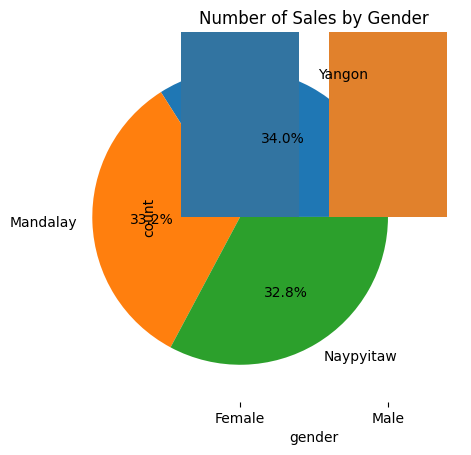

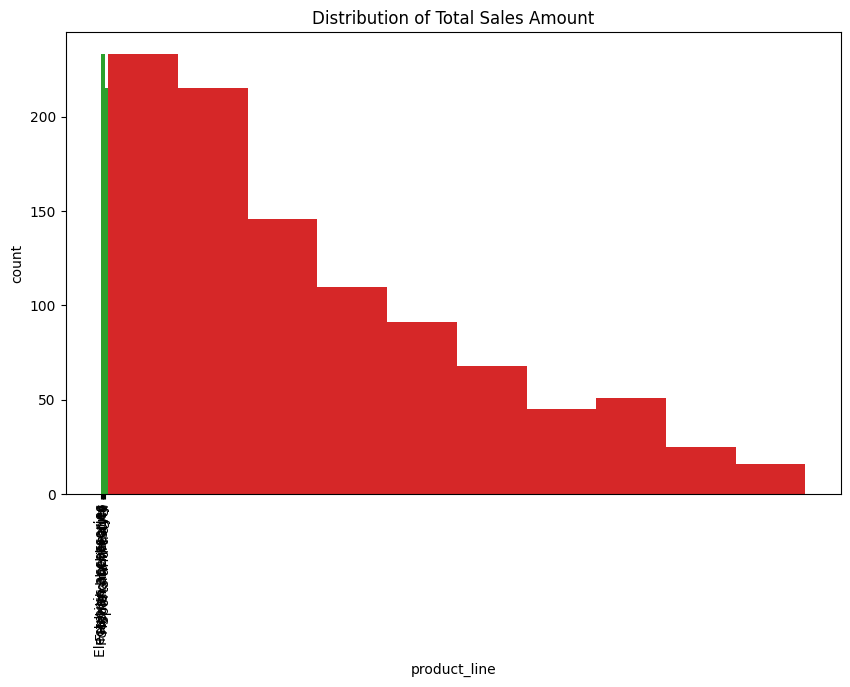

In [7]:
# Bar plot of branch column
sns.countplot(x='branch', data=data)
plt.title('Number of Sales by Branch')

# Pie chart of city column
plt.pie(data['city'].value_counts(), labels=data['city'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Sales by City')

# Bar plot of customer_type column
sns.countplot(x='customer_type', data=data)
plt.title('Number of Sales by Customer Type')

# Bar plot of gender column
sns.countplot(x='gender', data=data)
plt.title('Number of Sales by Gender')

# Bar plot of product_line column
plt.figure(figsize=(10,6))
sns.countplot(x='product_line', data=data)
plt.xticks(rotation=90)
plt.title('Number of Sales by Product Line')

# Histogram of unit_price column
plt.hist(data['unit_price'], bins=10)
plt.title('Distribution of Unit Prices')

# Histogram of quantity column
plt.hist(data['quantity'], bins=10)
plt.title('Distribution of Quantity')

# Histogram of tax_5_percent column
plt.hist(data['tax_5_percent'], bins=10)
plt.title('Distribution of 5% Tax Amount')

# Histogram of total column
plt.hist(data['total'], bins=10)
plt.title('Distribution of Total Sales Amount')